In [2]:
import numpy as np

In [3]:
import torch

In [4]:
import torch

In [4]:
input1 = np.random.random((128, 72, 1))

In [6]:
input = torch.tensor(input1)

In [7]:
import torch.nn as nn

In [8]:
class Encoder(nn.Module):
  def __init__(self, in_size, latent_size, latent_dim): 
    """
    in_size: number of features of the input dataset
    latent_size: number of cells of the lstm (for example, 32)
    latent_dim: dimension of the variational layer
    """
    super().__init__()
    self.lstm = nn.LSTM(input_size=in_size, hidden_size=latent_size, num_layers=1, batch_first=True
            # input and output tensors are provided as (batch, seq_len, feature(size))
        )
    self.dropout = nn.Dropout(0.2)

  def forward(self, w):
    #print("Input E: ", w.size())
    z, (h_n, c_n) = self.lstm(w)
    print("Z: ", z.size())
    print("H_n: ", h_n.size())
    print(c_n.size())
    z = self.dropout(z)
    h_n = self.dropout(h_n)
    return z, h_n

In [9]:
encoder = Encoder(1, 32, 32)

In [10]:
input = input.float()

In [11]:
z, h_n = encoder(input)

Z:  torch.Size([128, 72, 32])
H_n:  torch.Size([1, 128, 32])
torch.Size([1, 128, 32])


In [12]:
z

tensor([[[-1.7918e-02,  5.5720e-02, -1.4896e-02,  ..., -9.2130e-02,
          -5.4769e-02, -5.6465e-03],
         [-2.1083e-02,  9.8668e-02, -2.1174e-02,  ..., -1.3914e-01,
          -8.7341e-02, -4.4173e-03],
         [-1.9400e-02,  1.2799e-01, -2.0920e-02,  ..., -1.6379e-01,
          -1.0843e-01,  3.1948e-04],
         ...,
         [-0.0000e+00,  0.0000e+00, -2.6844e-02,  ..., -1.7919e-01,
          -1.2706e-01,  0.0000e+00],
         [-4.0339e-02,  1.5022e-01, -3.6801e-02,  ..., -1.7293e-01,
          -0.0000e+00, -4.7321e-03],
         [-3.2187e-02,  1.5530e-01, -2.8467e-02,  ..., -1.7912e-01,
          -1.2460e-01,  1.5010e-03]],

        [[-4.9737e-03,  0.0000e+00, -1.6021e-03,  ..., -1.0318e-01,
          -6.6787e-02,  4.4950e-03],
         [-2.8212e-03,  1.1505e-01, -2.3661e-03,  ..., -1.5286e-01,
          -1.0596e-01,  1.0311e-02],
         [-3.5508e-04,  1.4510e-01, -9.5958e-04,  ..., -1.7647e-01,
          -1.2937e-01,  1.6201e-02],
         ...,
         [-4.6965e-02,  1

In [13]:
h_n

tensor([[[-0.0322,  0.1553, -0.0285,  ..., -0.0000, -0.1246,  0.0015],
         [-0.0470,  0.1438, -0.0465,  ..., -0.1695, -0.1051, -0.0135],
         [-0.0400,  0.1447, -0.0406,  ..., -0.0000, -0.1082, -0.0000],
         ...,
         [-0.0379,  0.1529, -0.0356,  ..., -0.1748, -0.1175, -0.0040],
         [-0.0517,  0.1385, -0.0529,  ..., -0.1669, -0.0973, -0.0196],
         [-0.0633,  0.1279, -0.0000,  ..., -0.1575, -0.0000, -0.0278]]],
       grad_fn=<MulBackward0>)

In [168]:
out = z[:, -1, :]
out.size()

torch.Size([128, 32])

In [169]:
out

tensor([[-0.0155, -0.0547,  0.0136,  ..., -0.0927, -0.0035, -0.1441],
        [-0.0253, -0.0460, -0.0081,  ..., -0.0860, -0.0097, -0.1315],
        [-0.0225, -0.0482,  0.0012,  ..., -0.0884, -0.0057, -0.1386],
        ...,
        [-0.0203, -0.0503,  0.0055,  ..., -0.0895, -0.0044, -0.1410],
        [-0.0151, -0.0557,  0.0133,  ..., -0.0948, -0.0073, -0.1403],
        [-0.0094, -0.0611,  0.0219,  ..., -0.0996, -0.0086, -0.1412]],
       grad_fn=<SliceBackward0>)

In [170]:
h_n

tensor([[[-0.0155, -0.0547,  0.0136,  ..., -0.0927, -0.0035, -0.1441],
         [-0.0253, -0.0460, -0.0081,  ..., -0.0860, -0.0097, -0.1315],
         [-0.0225, -0.0482,  0.0012,  ..., -0.0884, -0.0057, -0.1386],
         ...,
         [-0.0203, -0.0503,  0.0055,  ..., -0.0895, -0.0044, -0.1410],
         [-0.0151, -0.0557,  0.0133,  ..., -0.0948, -0.0073, -0.1403],
         [-0.0094, -0.0611,  0.0219,  ..., -0.0996, -0.0086, -0.1412]]],
       grad_fn=<StackBackward0>)

In [171]:
h_n.squeeze()

tensor([[-0.0155, -0.0547,  0.0136,  ..., -0.0927, -0.0035, -0.1441],
        [-0.0253, -0.0460, -0.0081,  ..., -0.0860, -0.0097, -0.1315],
        [-0.0225, -0.0482,  0.0012,  ..., -0.0884, -0.0057, -0.1386],
        ...,
        [-0.0203, -0.0503,  0.0055,  ..., -0.0895, -0.0044, -0.1410],
        [-0.0151, -0.0557,  0.0133,  ..., -0.0948, -0.0073, -0.1403],
        [-0.0094, -0.0611,  0.0219,  ..., -0.0996, -0.0086, -0.1412]],
       grad_fn=<SqueezeBackward0>)

In [172]:
h_n.squeeze().shape

torch.Size([128, 32])

In [14]:
new_h_n = h_n.squeeze()

In [15]:
mean = nn.Linear(32, 16)
logvar = nn.Linear(32, 16)
mu = mean(new_h_n)
lv = logvar(new_h_n)
mu.size(), lv.size()

(torch.Size([128, 16]), torch.Size([128, 16]))

In [16]:
def reparametrize(mu, logvar):
        std = torch.exp(0.5 * logvar)
        noise = torch.randn_like(std)

        z = mu + noise * std
        return z

In [17]:
z_hat = reparametrize(mu, lv)
z_hat.size()

torch.Size([128, 16])

In [177]:
z_hat

tensor([[ 0.1239, -0.6681,  1.3902,  ...,  1.1396,  0.1375,  1.0787],
        [ 0.9572, -0.2179, -0.6760,  ..., -1.1401, -1.0432,  2.4269],
        [-0.1971, -1.0515, -0.3903,  ..., -1.1248, -1.8654,  0.6729],
        ...,
        [ 0.4748, -0.1771, -0.3092,  ...,  0.7638, -0.1938, -1.5681],
        [-0.1943, -1.5510, -0.1938,  ...,  1.6039,  0.2258, -0.1882],
        [ 1.1577,  0.6522, -0.4679,  ..., -0.3155, -1.4306, -1.4526]],
       grad_fn=<AddBackward0>)

In [18]:
decompression = nn.Linear(16, 32)
z_hat_n = decompression(z_hat)

In [179]:
z_hat_n.size()

torch.Size([128, 32])

In [43]:
z_hat_n.repeat(1, 72).size()

torch.Size([128, 2304])

In [19]:
n_z = z_hat_n.reshape(128, 1, 32).repeat(1, 72, 1)

In [20]:
class Decoder(nn.Module):
  def __init__(self, latent_size, out_size, train_window): 
    super().__init__()
    self.latent_size = latent_size
    self.window = train_window
    self.lstm = nn.LSTM(input_size=latent_size, hidden_size=latent_size, num_layers=1, batch_first=True
            # input and output tensors are provided as (batch, seq_len, feature(size))
        )
    self.dropout = nn.Dropout(0.2)
    self.output_layer = nn.Linear(latent_size, out_size)
        
  def forward(self, z):
    print(z.size())
    w, (h_n, c_n) = self.lstm(z)
    print("Out D: ", w.size())
    w = self.dropout(w)
    out = self.output_layer(w)
    print("Output D: ", out.size())
    return out

In [21]:
decoder = Decoder(32, 1, 72)
o = decoder(n_z)

torch.Size([128, 72, 32])
Out D:  torch.Size([128, 72, 32])
Output D:  torch.Size([128, 72, 1])


In [22]:
input.size()

torch.Size([128, 72, 1])

In [23]:
input

tensor([[[0.4738],
         [0.5478],
         [0.6249],
         ...,
         [0.4038],
         [0.3498],
         [0.6290]],

        [[0.7477],
         [0.7935],
         [0.8323],
         ...,
         [0.1432],
         [0.8405],
         [0.1132]],

        [[0.5344],
         [0.7407],
         [0.1542],
         ...,
         [0.1207],
         [0.2378],
         [0.6555]],

        ...,

        [[0.4400],
         [0.1910],
         [0.3655],
         ...,
         [0.3767],
         [0.8441],
         [0.2234]],

        [[0.5895],
         [0.2534],
         [0.9562],
         ...,
         [0.0939],
         [0.8792],
         [0.0439]],

        [[0.7840],
         [0.1828],
         [0.4411],
         ...,
         [0.4332],
         [0.2575],
         [0.0243]]])

In [24]:
input_r = input.squeeze()

In [25]:
input_r2 = input_r.reshape((128*72))

In [26]:
input_r2

tensor([0.4738, 0.5478, 0.6249,  ..., 0.4332, 0.2575, 0.0243])

In [27]:
import matplotlib.pyplot as plt

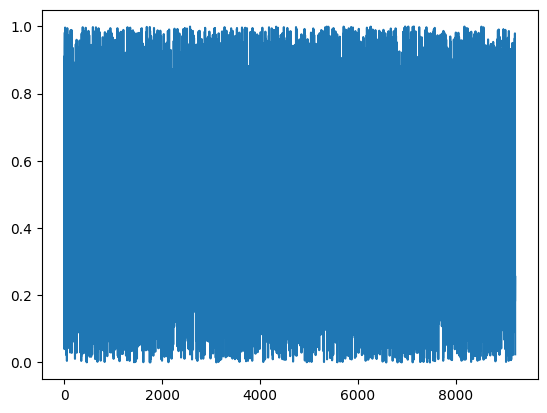

In [28]:
plt.plot(input_r2)

In [29]:
o

tensor([[[ 0.0933],
         [ 0.2195],
         [ 0.1775],
         ...,
         [ 0.2644],
         [ 0.2670],
         [ 0.2188]],

        [[ 0.1279],
         [ 0.1493],
         [ 0.1581],
         ...,
         [ 0.0936],
         [ 0.2003],
         [ 0.1863]],

        [[ 0.0941],
         [ 0.1841],
         [ 0.1624],
         ...,
         [ 0.1430],
         [ 0.1320],
         [ 0.1799]],

        ...,

        [[ 0.0647],
         [ 0.0808],
         [ 0.0203],
         ...,
         [-0.0981],
         [ 0.0338],
         [ 0.0253]],

        [[ 0.1994],
         [ 0.2479],
         [ 0.2632],
         ...,
         [ 0.3516],
         [ 0.3009],
         [ 0.3609]],

        [[ 0.1142],
         [ 0.0762],
         [ 0.1244],
         ...,
         [ 0.1615],
         [ 0.2224],
         [ 0.1448]]], grad_fn=<AddBackward0>)

In [30]:
o_2 = o.squeeze().reshape(128*72)

In [31]:
o_2

tensor([0.0933, 0.2195, 0.1775,  ..., 0.1615, 0.2224, 0.1448],
       grad_fn=<ReshapeAliasBackward0>)

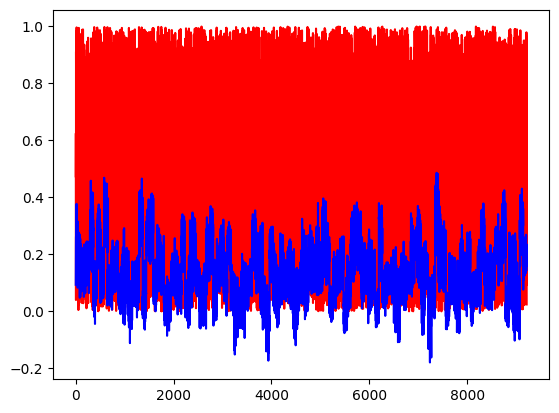

In [32]:
plt.plot(input_r2, color = "red")
plt.plot(o_2.detach().numpy(), color  ="blue")

In [33]:
o.size()

torch.Size([128, 72, 1])

In [34]:
criterion = nn.MSELoss(reduction = 'mean')

In [35]:
loss_1 = criterion(o, input)

In [36]:
loss_1

tensor(0.2257, grad_fn=<MseLossBackward0>)

In [37]:
torch.mean((input-o)**2)

tensor(0.2257, grad_fn=<MeanBackward0>)

In [38]:
kld1 = -0.5 * torch.sum(1 + lv - mu**2 - lv.exp())
kld1

tensor(23.7312, grad_fn=<MulBackward0>)

In [39]:
kld2 = -0.5 * torch.sum(1 + lv - mu**2 - lv.exp(), dim = 1)
kld2

tensor([0.1935, 0.1939, 0.1850, 0.1844, 0.1686, 0.1874, 0.2006, 0.1808, 0.1966,
        0.2048, 0.1976, 0.1776, 0.1932, 0.1818, 0.1905, 0.1979, 0.1976, 0.1824,
        0.1976, 0.1796, 0.1748, 0.1813, 0.1758, 0.1871, 0.1846, 0.1854, 0.1769,
        0.1979, 0.1817, 0.1814, 0.1846, 0.1999, 0.1933, 0.1809, 0.1809, 0.1805,
        0.1971, 0.1934, 0.1924, 0.1786, 0.1859, 0.1878, 0.1979, 0.1851, 0.1751,
        0.1996, 0.1896, 0.2051, 0.1854, 0.1776, 0.1845, 0.1867, 0.1717, 0.1771,
        0.1749, 0.1651, 0.1815, 0.1867, 0.1764, 0.1794, 0.1958, 0.1927, 0.1642,
        0.1996, 0.1906, 0.1890, 0.1837, 0.1790, 0.1681, 0.1842, 0.1942, 0.2030,
        0.1778, 0.1846, 0.1856, 0.1940, 0.1800, 0.1848, 0.1975, 0.2046, 0.1871,
        0.1743, 0.1859, 0.1740, 0.1969, 0.1911, 0.1926, 0.1803, 0.1834, 0.1984,
        0.1779, 0.1765, 0.1768, 0.2009, 0.1856, 0.1845, 0.1825, 0.1738, 0.1932,
        0.1815, 0.1864, 0.1825, 0.1756, 0.1843, 0.2024, 0.1764, 0.1866, 0.1836,
        0.1733, 0.1751, 0.1788, 0.1886, 

In [40]:
kld2.size()

torch.Size([128])

In [41]:
kld3 = torch.mean(-0.5 * torch.sum(1 + lv - mu**2 - lv.exp(), dim = 1), dim = 0)
kld3

tensor(0.1854, grad_fn=<MeanBackward1>)

In [42]:
kld3 /= 128 * 784

In [43]:
kld3

tensor(1.8475e-06, grad_fn=<DivBackward0>)

In [45]:
from tensorflow import keras
import plotly.graph_objects as go
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

2024-05-15 15:48:21.678160: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-15 15:48:21.697033: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 15:48:21.746430: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 15:48:22.670077: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [47]:
###LSTM AUTOENCODER
model_lstm = keras.Sequential()
model_lstm.add(keras.layers.LSTM(
    units=32,#normally is 64
    input_shape=(72, 1)
))
model_lstm.add(keras.layers.Dropout(rate=0.2))
model_lstm.add(keras.layers.RepeatVector(n=72))
model_lstm.add(keras.layers.LSTM(units=32, return_sequences=True))
model_lstm.add(keras.layers.Dropout(rate=0.2))
model_lstm.add(
  keras.layers.TimeDistributed(
    keras.layers.Dense(units=1)
  )
)
model_lstm.compile(loss='mae', optimizer='adam')
model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 72, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 72, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 72, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 72, 1)          │            33 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,705 (49.63 KB)

 Trainable params: 12,705 (49.63 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
output = keras.layers.LSTM(units=32, input_shape=(72, 1))(input1)
output

/nfs/home/medoro/Unsupervised_Anomaly_Detection_thesis/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<tf.Tensor: shape=(128, 32), dtype=float32, numpy=
array([[ 0.01095152,  0.05029638,  0.0117331 , ..., -0.01372467,
         0.04322131, -0.04937713],
       [ 0.01948896,  0.07006595,  0.00670312, ..., -0.01581299,
         0.05228005, -0.05244847],
       [ 0.00960909,  0.04594861,  0.01023959, ..., -0.01263437,
         0.04680898, -0.05281333],
       ...,
       [ 0.01249318,  0.05044529,  0.00377025, ..., -0.01052159,
         0.05293587, -0.05383182],
       [ 0.01245422,  0.05292718,  0.00826422, ..., -0.01307194,
         0.05195176, -0.05691139],
       [ 0.00582008,  0.03305991,  0.00994779, ..., -0.01062722,
         0.03387479, -0.03946306]], dtype=float32)>

In [82]:
h_n

tensor([[[ 0.0870,  0.0484, -0.0285,  ...,  0.0736,  0.0533, -0.0347],
         [ 0.0900,  0.0515, -0.0321,  ...,  0.0766,  0.0533, -0.0397],
         [ 0.0865,  0.0542, -0.0278,  ...,  0.0783,  0.0479, -0.0342],
         ...,
         [ 0.0875,  0.0477, -0.0291,  ...,  0.0735,  0.0541, -0.0359],
         [ 0.0744,  0.0515, -0.0116,  ...,  0.0751,  0.0382, -0.0167],
         [ 0.0856,  0.0505, -0.0265,  ...,  0.0753,  0.0497, -0.0331]]],
       grad_fn=<StackBackward0>)

In [51]:

y = keras.layers.RepeatVector(3)(z_hat_n.detach().numpy())
y.shape

TensorShape([128, 3, 32])

In [56]:
a = z_hat_n.reshape(128, 1, 32).repeat(1, 3, 1)

In [57]:
b = z_hat_n.repeat(1, 3).reshape(128, 3, 32)

In [59]:
(a == b).sum()

tensor(12288)

In [62]:
np.sum(a.detach().numpy() == y)

12288

In [52]:
y

<tf.Tensor: shape=(128, 3, 32), dtype=float32, numpy=
array([[[-0.97382516, -0.2587822 ,  0.530458  , ..., -0.35077804,
          0.00958964,  0.9750483 ],
        [-0.97382516, -0.2587822 ,  0.530458  , ..., -0.35077804,
          0.00958964,  0.9750483 ],
        [-0.97382516, -0.2587822 ,  0.530458  , ..., -0.35077804,
          0.00958964,  0.9750483 ]],

       [[ 0.76501423, -0.82421774, -0.87176156, ...,  0.24872535,
         -0.5217805 ,  0.5870452 ],
        [ 0.76501423, -0.82421774, -0.87176156, ...,  0.24872535,
         -0.5217805 ,  0.5870452 ],
        [ 0.76501423, -0.82421774, -0.87176156, ...,  0.24872535,
         -0.5217805 ,  0.5870452 ]],

       [[-0.14971618, -0.49785942, -0.7724875 , ..., -0.54019177,
          0.36706734,  0.24303234],
        [-0.14971618, -0.49785942, -0.7724875 , ..., -0.54019177,
          0.36706734,  0.24303234],
        [-0.14971618, -0.49785942, -0.7724875 , ..., -0.54019177,
          0.36706734,  0.24303234]],

       ...,

       [[

In [63]:
new = z_hat_n.reshape(128, 1, 32).repeat(1, 72, 1)